In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [13]:
len(df)

4622

#### 2. Вывести названия столбцов

In [14]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [15]:
print(*df.item_name.mode())

Chicken Bowl


#### 4. Построить гистрограмму частоты заказов по позициям (item)

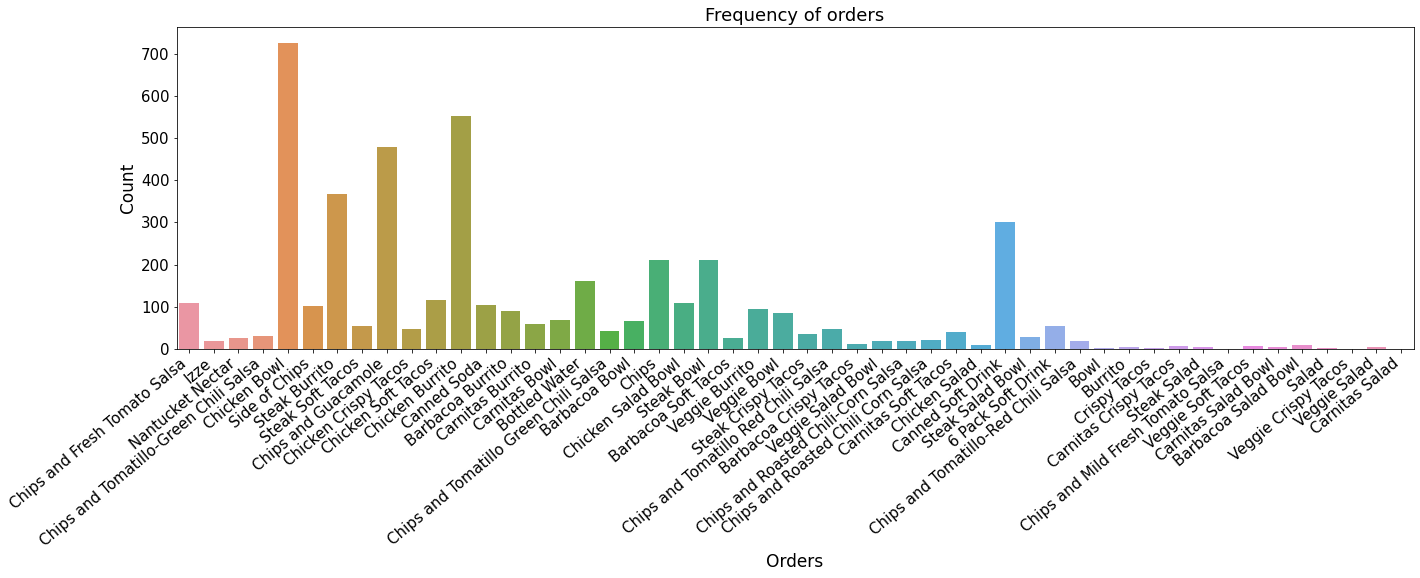

In [16]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
ax = sns.countplot(x="item_name", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Orders", ylabel = "Count")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.tight_layout()
plt.title('Frequency of orders')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [17]:
if df.dtypes['item_price'] == 'object':
    df['item_price'] = df['item_price'].apply(lambda row: float(row[1:]))

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

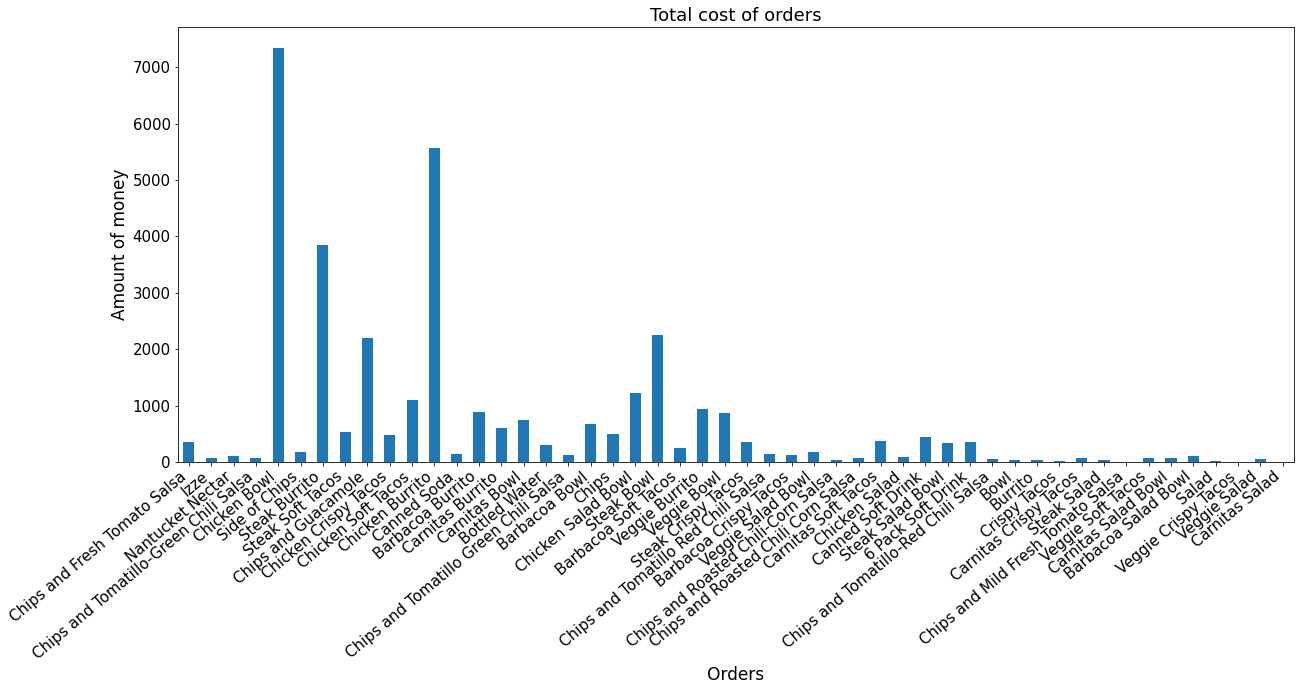

In [18]:
group = df.groupby('item_name', sort=False).aggregate({'item_price': np.sum})
ax = group.plot(y="item_price", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Orders", ylabel = "Amount of money")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
plt.title('Total cost of orders')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [19]:
#first way
print(*group.sum() / len(df))
#second way
print(df['item_price'].mean())
#third way
print(df.describe().loc['mean']['item_price'])

7.464335785374297
7.464335785374297
7.464335785374297


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [20]:
df.agg({
    "quantity": ["mean", "min", "max", "median"],
    "item_price": ["mean", "min", "max", "median"]
})

,quantity,item_price
mean,1.075725,7.464336
min,1.000000,1.090000
max,15.000000,44.250000
median,1.000000,8.750000


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

#### 12. Определить цену по каждой позиции в отдельности.

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.